Dependecies: Add your Dependencies here

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10
from sklearn.ensemble import BaggingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/credit_scoring_sample.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset from the CSV file

In [ ]:
# dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
# data = pd.DataFrame(dic,index=[0])
# data
data = pd.read_csv(file_path)
data


,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.0,0.0
995,0,0.019423,90,0,0,0,3500.0,0.0
996,0,0.173890,91,0,0,0,5767.0,0.0
997,0,32.000000,92,0,0,0,NaN,0.0


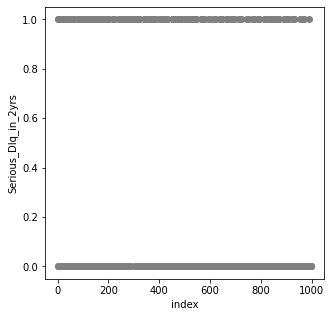

In [ ]:
# Plot Distrubution of the target variable
plt.figure(figsize=(5,5))
plt.scatter(data.index , data['Serious_Dlq_in_2yrs'],color='grey')
plt.xlabel("index")
plt.ylabel("Serious_Dlq_in_2yrs")
plt.show()

In [ ]:
data.isna().sum()

Serious_Dlq_in_2yrs                     0
Debt_Ratio                              0
age                                     0
Number_Of_Time_30-59_Days_Past_Due      0
Number_Of_Time_60-89_Days_Past_Due      0
Number_Of_Times_90_Days_Late            0
Monthly_Income                        186
Dependents                             23
dtype: int64

In [ ]:
# Handle the NaN values
data['Monthly_Income'].fillna((data['Monthly_Income'].mean()), inplace=True)
data['Dependents'].fillna((data['Dependents'].mean()), inplace=True)
data.isna().sum() #verifying

Serious_Dlq_in_2yrs                   0
Debt_Ratio                            0
age                                   0
Number_Of_Time_30-59_Days_Past_Due    0
Number_Of_Time_60-89_Days_Past_Due    0
Number_Of_Times_90_Days_Late          0
Monthly_Income                        0
Dependents                            0
dtype: int64

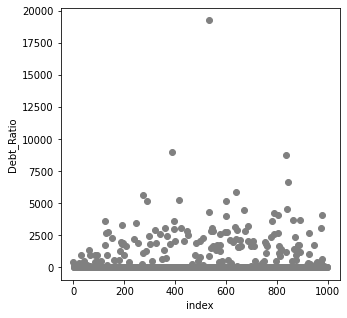

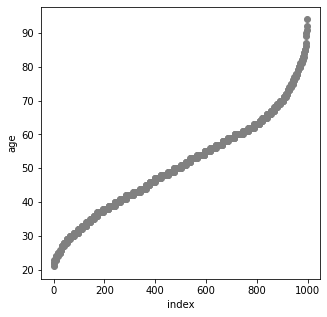

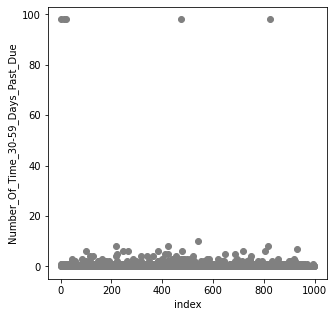

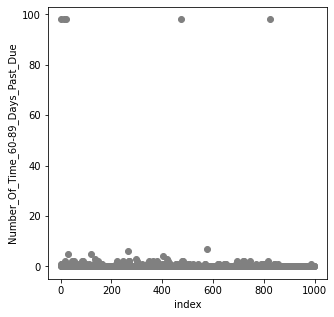

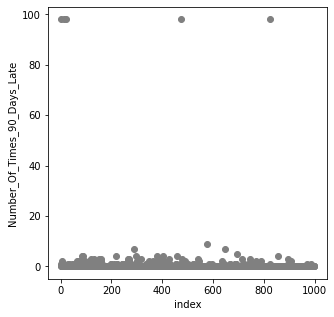

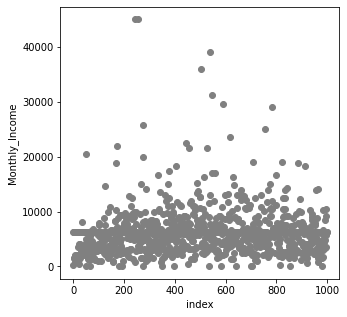

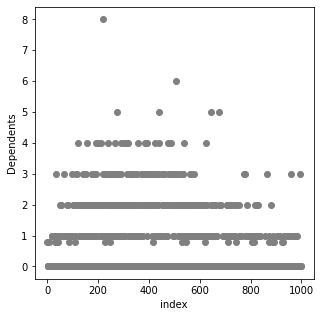

In [ ]:
# Visualize the distribution of data for every feature
for x in data.columns:
  if x != "Serious_Dlq_in_2yrs":
    plt.figure(figsize=(5,5))
    plt.xlabel("index")
    plt.ylabel(x)
    plt.scatter(data.index,data[x],color='grey')
    plt.show()
    print("\n")

Train the Random Forest Classifier

In [ ]:
# seperate depedendent and independent variables from the dataset
from sklearn.model_selection import train_test_split
x= data.drop(columns=['Serious_Dlq_in_2yrs']) #independent variables
y = data['Serious_Dlq_in_2yrs']#dependent variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

acc_score =[]
skf = StratifiedKFold(n_splits = 11,shuffle=True,random_state=None)
rf1 = RandomForestClassifier( random_state=2,max_depth = 3,n_estimators =50,max_features=4)
rf2 = RandomForestClassifier( random_state=2,max_depth = 3,n_estimators =100,max_features=4)
rf3 = RandomForestClassifier( random_state=2,max_depth = 4,n_estimators =50,max_features=3)
rf4 = RandomForestClassifier( random_state=2,max_depth = 4,n_estimators =100,max_features=3)
rf5 = RandomForestClassifier( random_state=2,max_depth = 2,n_estimators =50)
rf6 = RandomForestClassifier( random_state=2,max_depth = 2,n_estimators =100)
rf7 = RandomForestClassifier( random_state=2,max_depth = 5,n_estimators =100,max_features=2)
rf = [rf1,rf2,rf3,rf4,rf5,rf6,rf7]
#max_acc=0
acc = []
max_acc = []
#skf.get_n_splits(x,y)
for train_i,test_i in skf.split(x,y):
  x_train, x_test = x.iloc[train_i,:], x.iloc[test_i,:] 
  y_train, y_test = y[train_i], y[test_i]
  acc_var = []
  a = 0
  for i in rf:
    i.fit(x_train,y_train)
    acc_score = i.score(x_test, y_test)
    acc_var.append(acc_score)
    if(a < acc_score):
      a = acc_score
      index = rf.index(i)
  acc.append(acc_var)
  max_acc.append(index)
 
print(max_acc)


[0, 1, 0, 6, 2, 2, 0, 3, 4, 6, 4]


Final model after manual check of parameters

In [ ]:
#final model selection 
max_occ =0;
index =1
for i in max_acc:
  a = max_acc.count(i)
  if(a>max_occ):
    max_occ =a
    index =i
max_occ
index 

0

In [ ]:
model = rf[index]
model.score(x_test,y_test) 

0.8222222222222222

In [ ]:
skf_f = StratifiedKFold(n_splits = 5,shuffle=True,random_state=None)
final_acc = []
for train_i,test_i in skf_f.split(x,y):
  x_train, x_test = x.iloc[train_i,:], x.iloc[test_i,:] 
  y_train, y_test = y[train_i], y[test_i]
  model.fit(x_train,y_train)
  final_acc.append(model.score(x_test,y_test))
final_acc

[0.82, 0.825, 0.755, 0.805, 0.7989949748743719]

Using GridSearchCV

In [ ]:
# define parameters for the random forest
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7], 'max_depth': [3,4,5],'n_estimators':[50,100]}
rf =  RandomForestClassifier(n_estimators = 100,random_state = 42)

In [ ]:
# perform cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

In [ ]:
# perform grid search
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(x_train, y_train.ravel()) 


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [ ]:
#Get the best score from the grid search
print(grid_search.best_score_) 

0.8132068452380954


In [ ]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 7, 'n_estimators': 50}


In [ ]:
from sklearn.model_selection import cross_val_score
model.set_params = (grid_search.best_params_)
scores = cross_val_score(model, x, y, cv = skf_f, scoring='roc_auc')
scores

array([0.82446429, 0.76470238, 0.87071429, 0.80029762, 0.78770983])

In [ ]:
#Final Trained Model
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
# Find the feature which has the weakest impact in Random Forest Model
features = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(features)

Number_Of_Time_30-59_Days_Past_Due    0.229726
Number_Of_Times_90_Days_Late          0.218222
Monthly_Income                        0.142937
age                                   0.132613
Number_Of_Time_60-89_Days_Past_Due    0.130001
Debt_Ratio                            0.113098
Dependents                            0.033403
dtype: float64


No handles with labels found to put in legend.


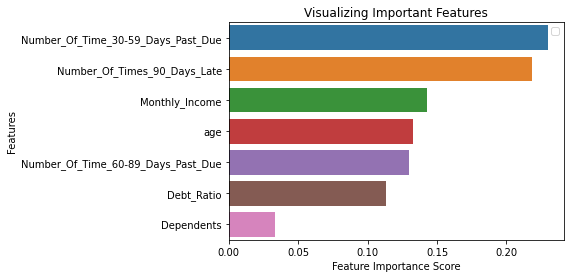

In [ ]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=features, y=features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

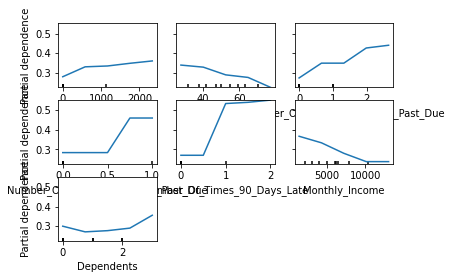

In [ ]:
# Find the feature which has the weakest impact in Random Forest Model
from sklearn.inspection import plot_partial_dependence
ft = [0,1,2,3,4,5,6]
f = data.columns
plot_partial_dependence(gsbe,x,ft,feature_names= f[1:],grid_resolution=5)

In [ ]:
# Perform bagging classification using decision trees as the base classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# explore bagging ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [2,3,4]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, x, y):
	# define the evaluation procedure
	cv = StratifiedKFold(n_splits=5)
	# evaluate the model and collect the results
	scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
# Summarize the performance by getting mean and standard deviation of scores
from matplotlib import pyplot
models = get_models()

results, names, means = list(), list(), list()
for name, model in models.items():

 scores = evaluate_model(model, x, y)
 print(scores)
	
 results.append(scores)
 names.append(name)
 means.append(scores.mean())

 print('At  %s, mean is %.3f and standard deviation is (%.3f)' % (name, scores.mean(), scores.std()))
 print("\n")

[0.325      0.52       0.36       0.48       0.69849246]
At  2, mean is 0.477 and standard deviation is (0.132)


[0.305      0.375      0.445      0.31       0.74371859]
At  3, mean is 0.436 and standard deviation is (0.162)


[0.445      0.475      0.355      0.395      0.71356784]
At  4, mean is 0.477 and standard deviation is (0.125)




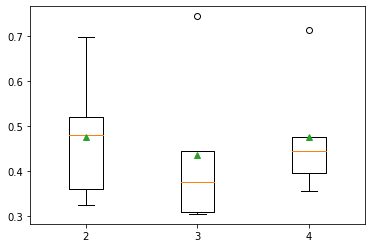

In [ ]:
# Plot the model performance for comparison using boxplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# Compare the best performance of bagging with random forest
i = means.index(max(means))
rf_score = clf.score(x_test,y_test)
print('The best performance of bagging is achieved at',(i+1)/10)
print('Accuracy of bagging model: ',max(means))
print('Accuracy of random forest model: ', rf_score)
print('\n')

if rf_score>max(means):
  print('Random forest model performed better')
elif max(means)>rf_score:
  print('Bagging model performed bettter')
else:
  print('Both models were equally good')

The best performance of bagging is achieved at 0.3
Accuracy of bagging model:  0.47671356783919594
Accuracy of random forest model:  0.7587939698492462


Random forest model performed better


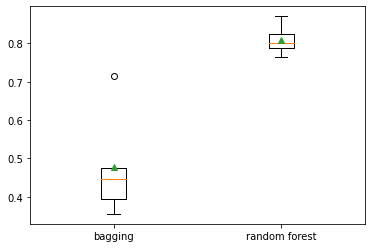

In [596]:
result = [[0.445,0.475,0.355,0.395, 0.71356784],[0.82446429, 0.76470238, 0.87071429, 0.80029762, 0.78770983]] #from the best performances
n=['bagging','random forest']
pyplot.boxplot(result, labels=n, showmeans=True)
pyplot.show()

In [ ]:
#Tuning Bagging classifier for best parameters
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators" : [5,10,15,20,25,30],
    "max_samples" : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
}
random_search = RandomizedSearchCV(BaggingClassifier(),param_distributions=params, n_iter=5, scoring = 'roc_auc', 
                                   n_jobs = -1, cv=5, verbose = 3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=1.0, n_estimators=10,
                                               n_jobs=None, oob_score=False,
                                               random_state=None, verbose=0,
                                               warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                        0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'n_estimators': [5, 10, 15, 20, 25,
                                   

In [ ]:
random_search.best_estimator_

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.4, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
bg = BaggingClassifier(max_samples = random_search.best_params_['max_samples'],n_estimators=random_search.best_params_['n_estimators'])
bg.fit(x_train,y_train)
bg.score(x_test,y_test)

0.7688442211055276

In [ ]:
# References
